# Multi-Layer Perceptron

## Plotting Grid Search Results

In [2]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
import json

%matplotlib inline

In [3]:
def create_table(grid_search_results, param1_name, param2_name, score_name='mean_train_score', scoring='avg'):
    counter = 1
    scores = grid_search_results[score_name]
    params = grid_search_results['params']
    param1_range = np.unique(list(grid_search_results['param_' + param1_name].values()))
    param2_range = np.unique(list(grid_search_results['param_' + param2_name].values()))
    
    sum_table = np.zeros((len(param1_range), len(param2_range)))
    max_table = np.zeros((len(param1_range), len(param2_range)))
    min_table = np.ones((len(param1_range), len(param2_range))) * 2
    count_table = np.zeros((len(param1_range), len(param2_range)))
    for k in params.keys():
        param1_val = params[k][param1_name]
        param2_val = params[k][param2_name]
        param1_idx = np.where(param1_range == param1_val)[0][0]
        param2_idx = np.where(param2_range == param2_val)[0][0]
        score = scores[k]
        sum_table[param1_idx][param2_idx] += score
        count_table[param1_idx][param2_idx] += 1
        max_table[param1_idx][param2_idx] = max(max_table[param1_idx][param2_idx], score)
        min_table[param1_idx][param2_idx] = min(min_table[param1_idx][param2_idx], score)
    table = None
    if scoring == 'min':
        #print('Creating table of minimum values')
        table = min_table
    elif scoring == 'max':
        #print('Creating table of maximum values')
        table = max_table
    else:
        #print('Creating table of average values')
        table = sum_table / count_table
    
    return pd.DataFrame(table, index=param1_range, columns=param2_range)

def graph_heat_map(data, score_type, ax, param1_name, param2_name, title='None', scoring='avg'):
    df = create_table(data['results'], param1_name, param2_name, score_type, scoring)
    sns.heatmap(df, annot=True, fmt='0.2g', ax=ax, vmin=0, vmax=1)
    ax.set_title(title)
    ax.set_ylabel(param1_name)
    ax.set_xlabel(param2_name)


def graph_results(data, param1_name, param2_name, scoring='avg'):
    fig, ax = plt.subplots(1, 2, figsize=(19,7))
    graph_heat_map(data, 'mean_train_score', ax[0], param1_name, param2_name, title='Training Set Accuracy (%s)'%scoring, scoring=scoring)
    graph_heat_map(data, 'mean_test_score', ax[1], param1_name, param2_name, title='Test Set Accuracy (%s)'%scoring, scoring=scoring)

In [3]:
file_path = 'simple_model_results/mlp3.json'
mlp3_data = json.load(open(file_path))

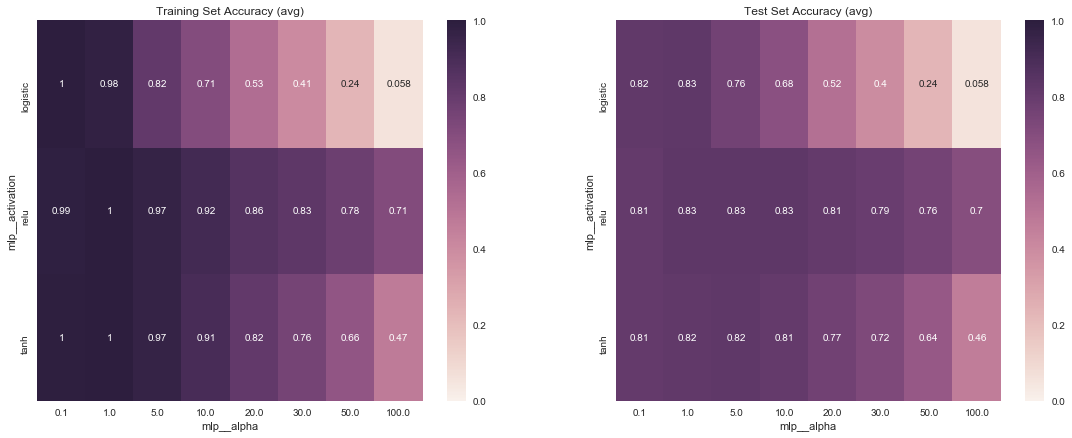

In [4]:
graph_results(mlp3_data, 'mlp__activation', 'mlp__alpha')

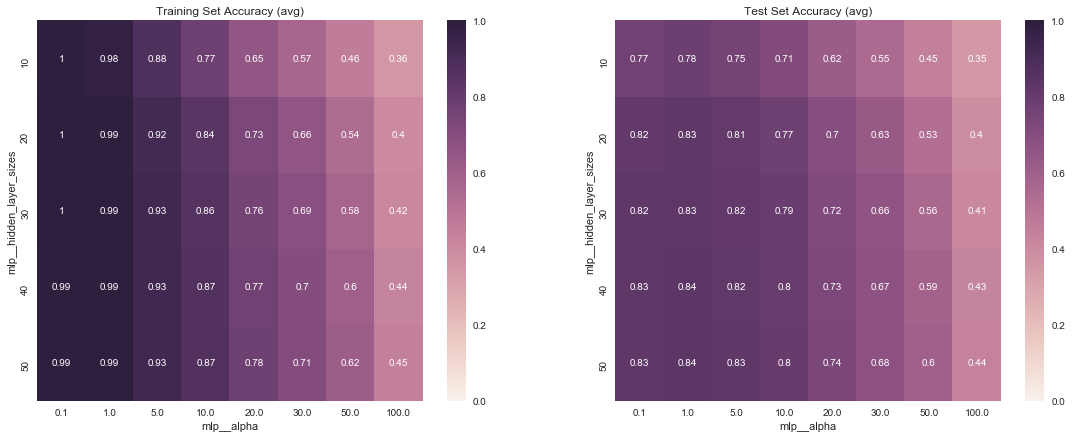

In [5]:
graph_results(mlp3_data, 'mlp__hidden_layer_sizes', 'mlp__alpha')

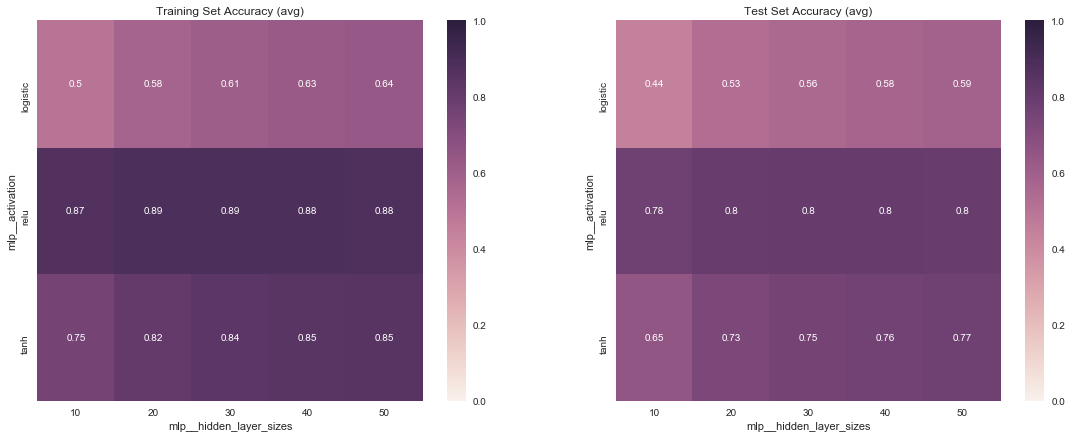

In [6]:
graph_results(mlp3_data, 'mlp__activation', 'mlp__hidden_layer_sizes')

## Logistic Activation Function

### Adam solver

In [19]:
mlp_logi_data = json.load(open('simple_model_results/mlp4.json'))

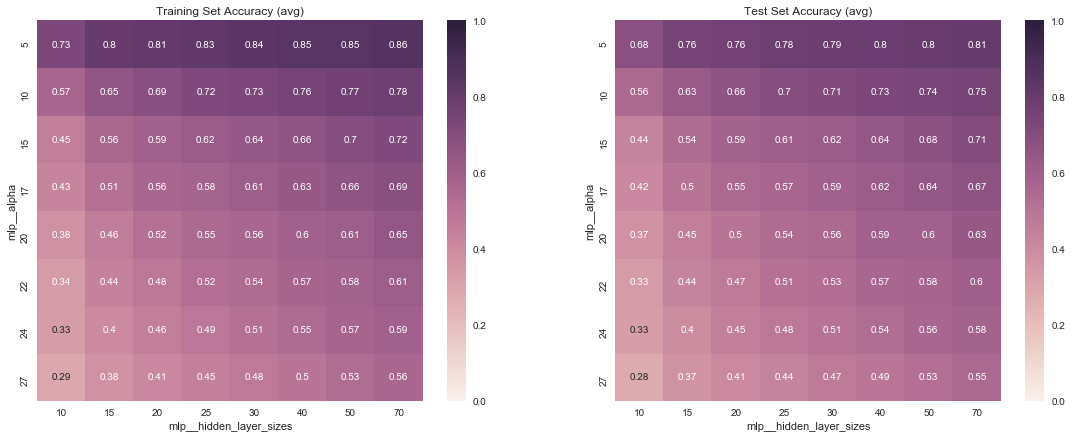

In [20]:
graph_results(mlp_logi_data, 'mlp__alpha', 'mlp__hidden_layer_sizes')

### L-BFGS solver

In [22]:
mlp_logi_lbfgs_data = json.load(open('simple_model_results/mlp-logistic-lbfgs.json'))

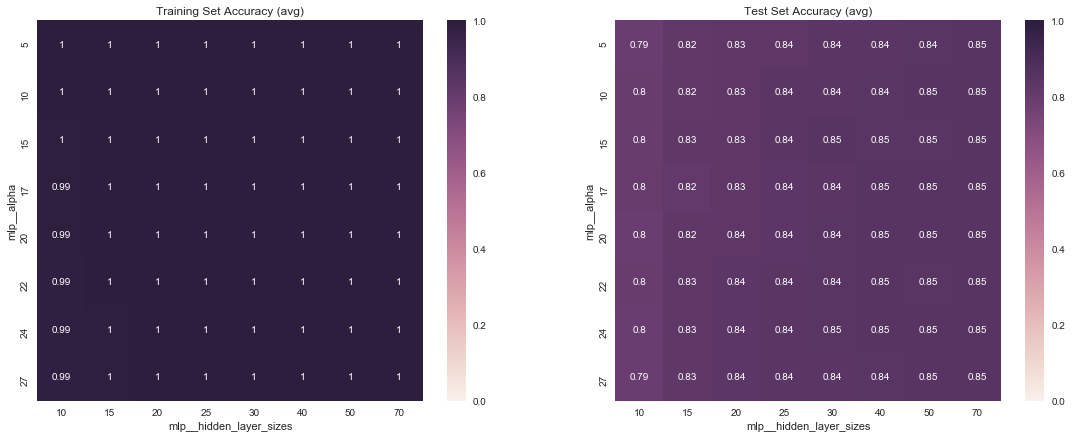

In [23]:
graph_results(mlp_logi_lbfgs_data, 'mlp__alpha', 'mlp__hidden_layer_sizes')

## ReLU activation Function

### Adam solver

In [11]:
mlp_relu_data = json.load(open('simple_model_results/mlp-relu.json'))

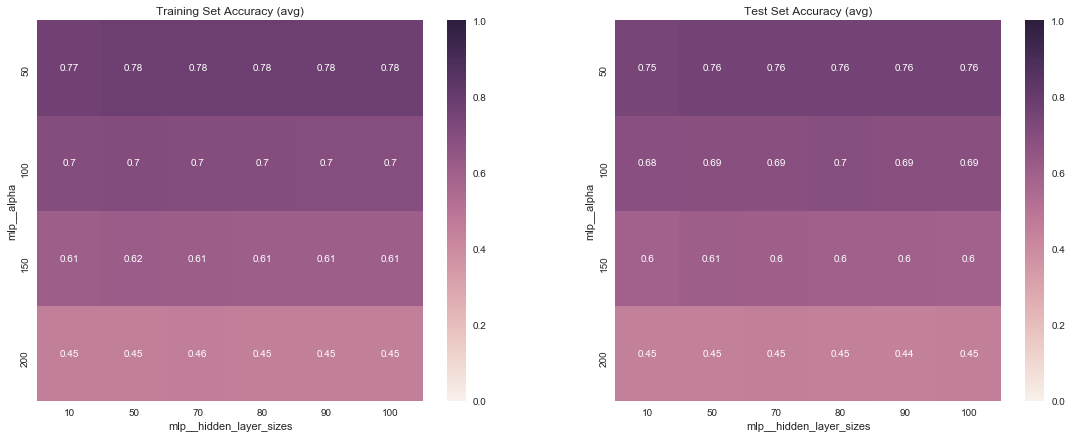

In [12]:
graph_results(mlp_relu_data, 'mlp__alpha', 'mlp__hidden_layer_sizes')

### L-BFGS solver

In [4]:
mlp_relu_lbfgs_data = json.load(open('simple_model_results/mlp-relu-lbfgs.json'))

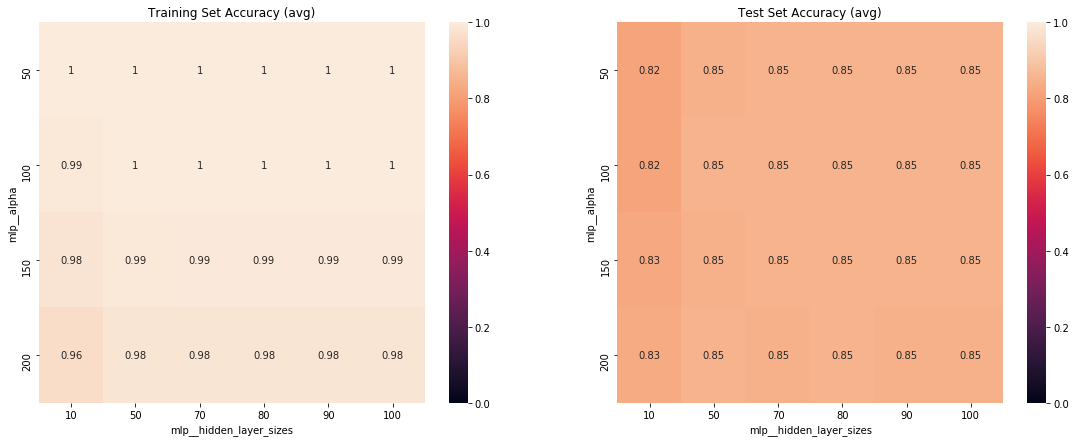

In [5]:
graph_results(mlp_relu_lbfgs_data, 'mlp__alpha', 'mlp__hidden_layer_sizes')

## Tanh Activation Function

### Adam solver

In [14]:
mlp_tanh_data = json.load(open('simple_model_results/mlp-tanh.json'))

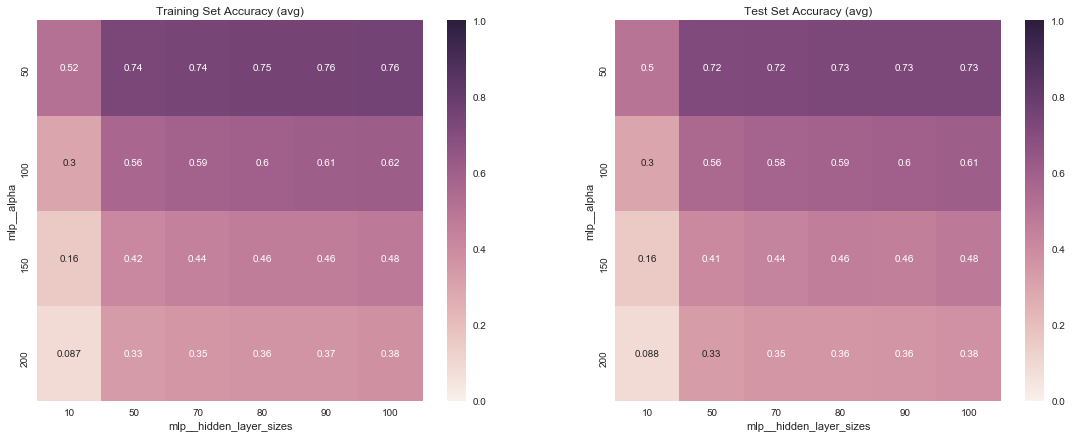

In [15]:
graph_results(mlp_tanh_data, 'mlp__alpha', 'mlp__hidden_layer_sizes')

### L-BFGS solver

In [6]:
mlp_tanh_lbfgs_data = json.load(open('simple_model_results/mlp-tanh-lbfgs.json'))

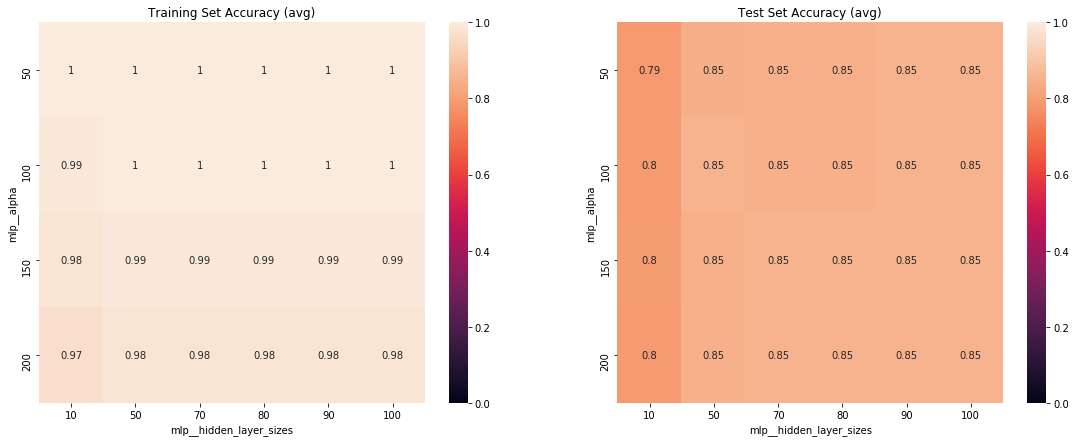

In [7]:
graph_results(mlp_tanh_lbfgs_data, 'mlp__alpha', 'mlp__hidden_layer_sizes')